**Evento** : Germinación de la semilla

**Survival**: El evento de interes no ocurre

**Survival duration**: Tiempo hasta que ocurra el evento de interés (o el final de nuestras observaciones)


96 horas (fin de observaciones-> NA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the Excel sheet
df = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='Germina', usecols=['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410'])#, parse_dates=['H'])

df.head()

,T1_180,T9_180,T1_250,T9_250,T1_395,T9_395,T1_410,T9_410
0,12 h,28 h,14 h,13 h,16 h,15 h,10 h,10 h
1,28 h,28 h,14 h,13 h,16 h,35 h,29 h,28 h
2,12 h,28 h,9 h,13 h,16 h,35 h,30 h,11 h
3,12 h,13 h,9 h,13 h,16 h,15 h,30 h,28 h
4,28 h,28 h,9 h,13 h,16 h,15 h,30 h,28 h


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1_180  238 non-null    object
 1   T9_180  255 non-null    object
 2   T1_250  258 non-null    object
 3   T9_250  259 non-null    object
 4   T1_395  254 non-null    object
 5   T9_395  257 non-null    object
 6   T1_410  260 non-null    object
 7   T9_410  260 non-null    object
dtypes: object(8)
memory usage: 16.4+ KB


In [4]:
# Remove 'h' from values while preserving non-string values
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(' h', '') if isinstance(x, str) else x)

#df.tail(30)

In [5]:
df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']]=df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']].astype('float')

print(df.dtypes)
df.describe()

T1_180    float64
T9_180    float64
T1_250    float64
T9_250    float64
T1_395    float64
T9_395    float64
T1_410    float64
T9_410    float64
dtype: object


,T1_180,T9_180,T1_250,T9_250,T1_395,T9_395,T1_410,T9_410
count,238.000000,255.000000,258.000000,259.000000,254.000000,257.000000,260.000000,260.000000
mean,19.571429,16.925490,14.426357,13.822394,27.964567,18.097276,28.757692,23.196154
std,11.669913,8.391875,10.354251,6.846555,11.865298,10.334743,8.023550,8.151319
min,12.000000,13.000000,9.000000,9.000000,16.000000,15.000000,10.000000,10.000000
25%,12.000000,13.000000,9.000000,13.000000,16.000000,15.000000,29.000000,11.000000
50%,13.000000,13.000000,14.000000,13.000000,35.000000,15.000000,30.000000,28.000000
75%,28.000000,13.000000,15.000000,13.000000,35.000000,16.000000,30.000000,28.000000
max,81.000000,81.000000,82.000000,82.000000,58.000000,84.000000,37.000000,30.000000


In [6]:
# Melt the DataFrame to create 'Measurement' and 'Value' columns
melted_df = pd.melt(df, var_name="Measurement", value_name="Time")

In [7]:
# Extract the measurement type (T1 or T9) from the column name
melted_df["Material"] = melted_df["Measurement"].str.split("_").str[0]
melted_df["UV"] = melted_df["Measurement"].str.split("_").str[1]

In [8]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measurement  2080 non-null   object 
 1   Time         2041 non-null   float64
 2   Material     2080 non-null   object 
 3   UV           2080 non-null   object 
dtypes: float64(1), object(3)
memory usage: 65.1+ KB


In [9]:
melted_df['UV']=melted_df['UV'].astype('category')
melted_df['Time']=melted_df['Time'].astype('float')

# EDA 

Text(0, 0.5, 'Tiempo [h]')

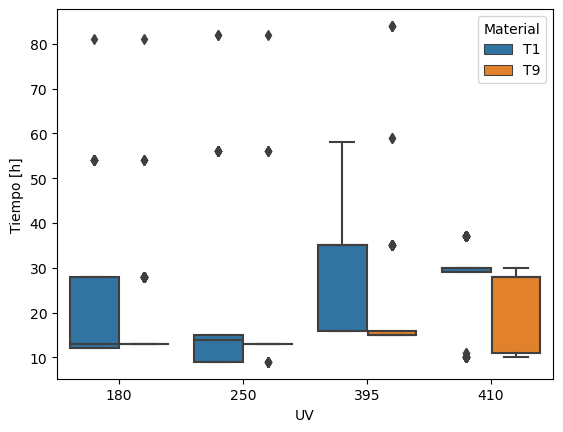

In [10]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Material")
plt.xlabel('UV')
plt.ylabel('Tiempo [h]')
#plt.title('Sales by Quarter')

Text(0, 0.5, 'Tiempo [h]')

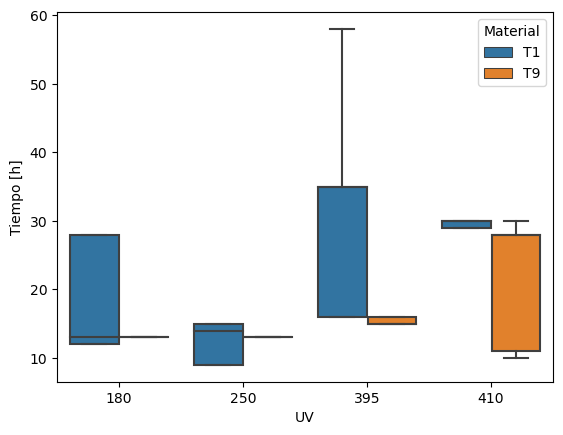

In [11]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Material", showfliers = False)
plt.xlabel('UV')
plt.ylabel('Tiempo [h]')

Text(0, 0.5, 'Frecuencia')

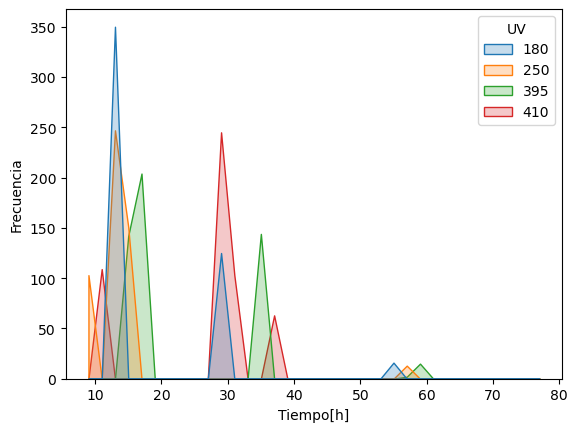

In [12]:
sns.histplot(data=melted_df,x="Time", hue="UV",element="poly", bins=range(8,80,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Material T1')

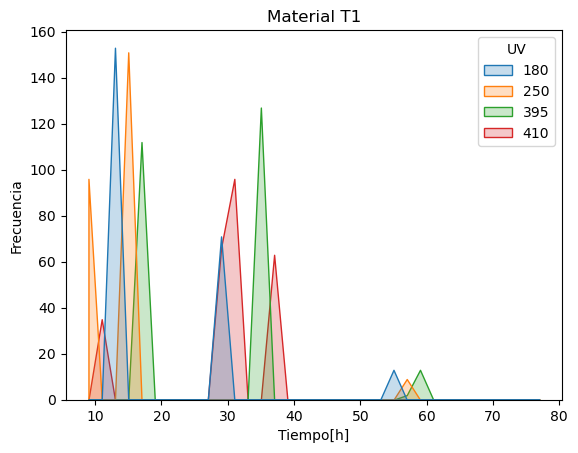

In [13]:
sns.histplot(data=melted_df[melted_df['Material']=='T1'],x="Time", hue="UV",element="poly", bins=range(8,80,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('Frecuencia')
plt.title('Material T1')

Text(0.5, 1.0, 'Material T9')

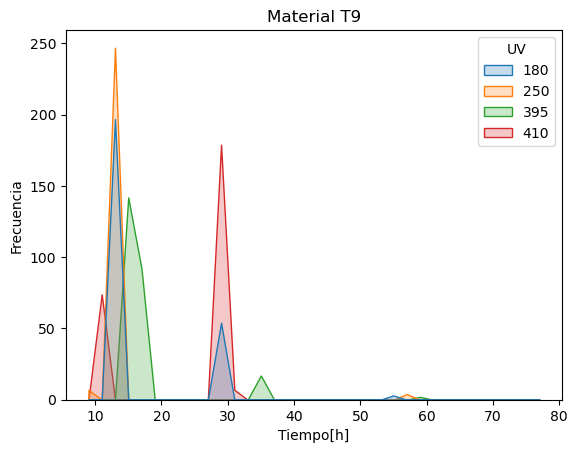

In [14]:
sns.histplot(data=melted_df[melted_df['Material']=='T9'],x="Time", hue="UV",element="poly", bins=range(8,80,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('Frecuencia')
plt.title('Material T9')

<Axes: xlabel='Time', ylabel='Density'>

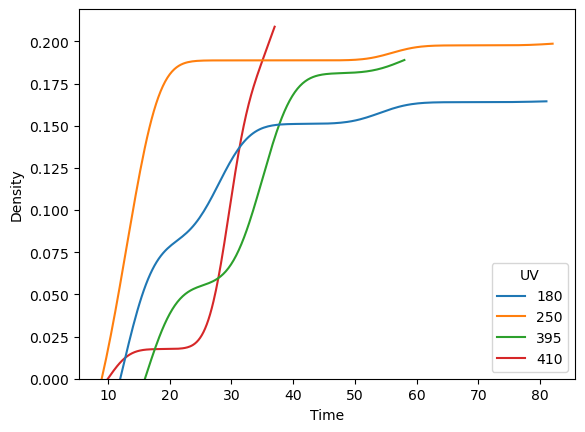

In [15]:
sns.kdeplot(data=melted_df[melted_df['Material']=='T1'], x='Time', hue='UV', cut=0, cumulative=True)

<Axes: xlabel='Time', ylabel='Density'>

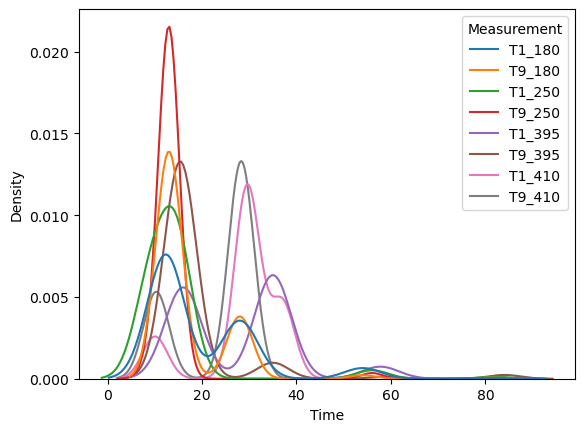

In [16]:
sns.kdeplot(data=melted_df, x='Time', hue='Measurement')

/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


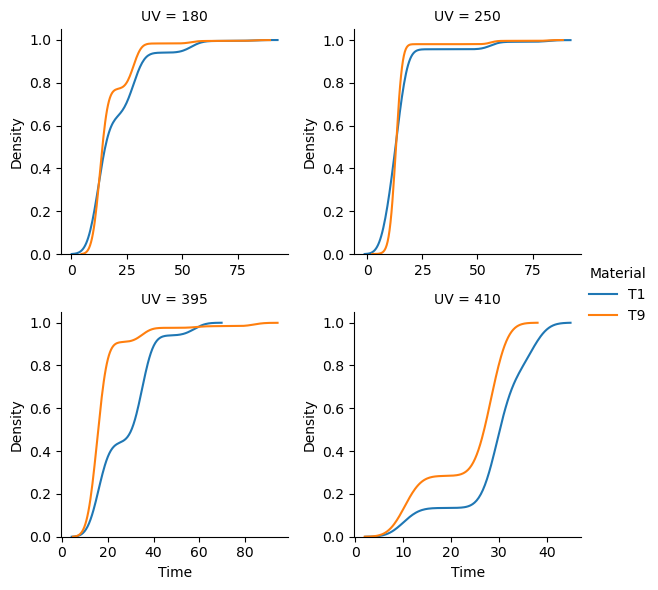

In [17]:
g = sns.FacetGrid(melted_df,col="UV",col_wrap=2, hue="Material",sharex=False, sharey=False, margin_titles=True)
g.map(sns.kdeplot, "Time", cumulative=True)
g.add_legend()

sns.histplot(
    melted_df, x="Time", hue="UV", element="step",
    stat="density", common_norm=False,
)

sns.histplot(data=melted_df, x="Time", y="UV", hue="UV", bins=range(2,40,2))

sns.histplot(data=melted_df, x="Time", y="UV", hue="Material", bins=range(2,40,2))

sns.histplot(data=melted_df, x="Time", y="Material", hue="UV", bins=range(2,40,2))

Text(0.5, 1.0, 'Material T1')

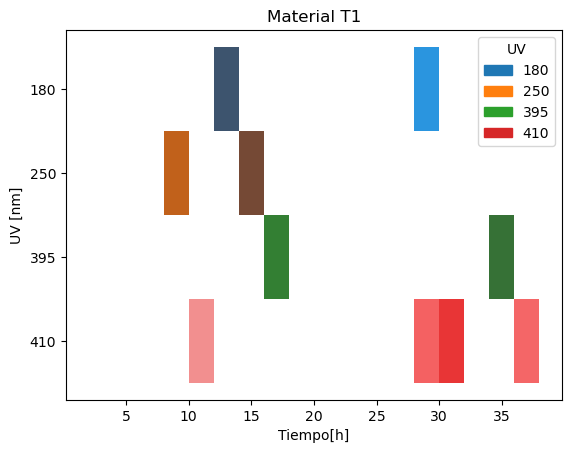

In [18]:
sns.histplot(data=melted_df[melted_df['Material']=='T1'], x="Time", y="UV", hue="UV", bins=range(2,40,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('UV [nm]')
plt.title('Material T1')

Text(0.5, 1.0, 'Material T9')

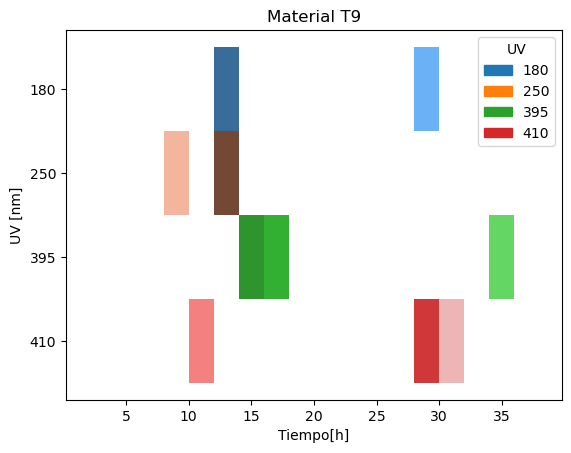

In [19]:
sns.histplot(data=melted_df[melted_df['Material']=='T9'], x="Time", y="UV", hue="UV", bins=range(2,40,2))
plt.xlabel('Tiempo[h]')
plt.ylabel('UV [nm]')
plt.title('Material T9')

/Users/Mila/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


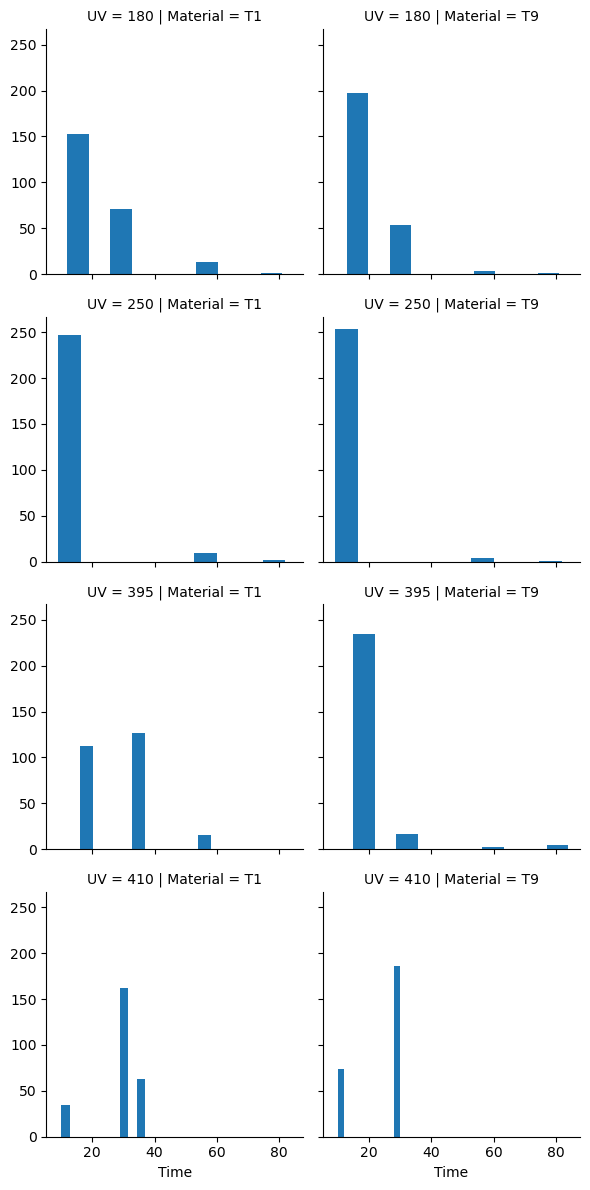

In [20]:
# Plot histograms grouped by 'Measurement_Type', using FacetGrid
g = sns.FacetGrid(melted_df, col="Material",row="UV")
g.map(plt.hist, "Time")
#g.set_titles(col_template="{col_name}")
plt.show()

In [21]:
# Filter the rows based on the condition
rows_to_remove = melted_df[melted_df['Measurement'] == 'T1_180'].tail(20)

# Remove the filtered rows from the DataFrame
melted_df = melted_df.drop(rows_to_remove.index)

# Print the updated DataFrame
#print(melted_df)

In [22]:
melted_df.head()

,Measurement,Time,Material,UV
0,T1_180,12.0,T1,180
1,T1_180,28.0,T1,180
2,T1_180,12.0,T1,180
3,T1_180,12.0,T1,180
4,T1_180,28.0,T1,180


In [23]:
# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['Time']):
        flag = 0
    else:
        flag = 1
    return flag

In [24]:
# Create a censorship flag column
melted_df['observed'] =melted_df.apply(check_observed, axis=1)

# Print average of observed: the proportion of censored data in the melted_df
print(np.average(melted_df['observed']))

# Count censored data
count = len(melted_df[melted_df['observed'] == 0])

# Print the count to console
print(count)

0.9907766990291262
19


In [25]:
200/238

0.8403361344537815

In [26]:
100-melted_df.Time.isnull().groupby(melted_df['Measurement']).mean()*100

Measurement
T1_180     99.166667
T1_250     99.230769
T1_395     97.692308
T1_410    100.000000
T9_180     98.076923
T9_250     99.615385
T9_395     98.846154
T9_410    100.000000
Name: Time, dtype: float64

In [27]:
melted_df.Time.isnull().groupby(melted_df['Measurement']).sum().astype(int)

Measurement
T1_180    2
T1_250    2
T1_395    6
T1_410    0
T9_180    5
T9_250    1
T9_395    3
T9_410    0
Name: Time, dtype: int64

In [28]:
#print('Valor mínimo de germinación:' 
print(melted_df['Time'].min())
#print('Valor maximo de germinación:' 
print(melted_df['Time'].max())

9.0
84.0


La última semilla que germino ocurrio a las 84 horas. Para todas las semillas que no germinaron vamos a asignarles el valor de 96 horas (el término right censored nos dice que el evento de interés, Germinación, no ha ocurrido dentro de nuestra ventana de observación.) como el fin de las observaciones. FILLNA

In [29]:
#melted_df.dropna(subset=['Time', 'observed'], inplace= True)

melted_df.Time.fillna(96,inplace= True)

melted_df.describe()

,Time,observed
count,2060.000000,2060.000000
mean,21.049515,0.990777
std,13.114413,0.095617
min,9.000000,0.000000
25%,13.000000,1.000000
50%,15.000000,1.000000
75%,28.000000,1.000000
max,96.000000,1.000000


# Non-Parametric

In [30]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test

In [31]:
# Calculate Median Survival Time
kmf = KaplanMeierFitter(alpha=0.05) # calculate a 95% confidence interval
kmf.fit(melted_df['Time'], melted_df['observed'])

median_ = kmf.median_survival_time_
median_

15.0

<Axes: xlabel='timeline'>

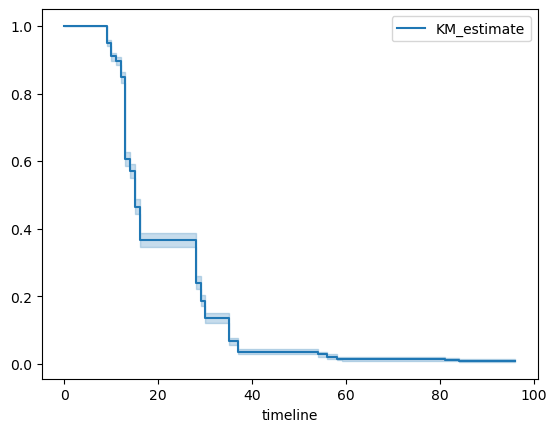

In [32]:
kmf.plot_survival_function()

Porción de la población que sobrevive (no-germina) en un momento dado

In [33]:
kmf.predict([10, 15, 20, 25])

10    0.909709
15    0.465049
20    0.366019
25    0.366019
Name: KM_estimate, dtype: float64

Porción de la población que No-sobrevive (germina) en un momento dado

In [34]:
print(1-kmf.predict(20))

0.6339805825242719


### Examinar como varía la supervivencia

El patrón general de supervivencia cuenta una historia bastante convincente sobre la germinación de las semillas de quinoa, pero puede ser interesante examinar cómo este patrón varía según el material T1, T9 y el tratamiento UV al que fue sometido.

T1 : 

T9 :


UV : 180 nm, 250 nm, 395 nm y 410 nm


Al centrarnos en los atributos de las semillas y los tratamientos, es posible que podamos identificar variables que nos digan algo sobre la probabilidad de no germinación de las semillas de quinoa.


In [35]:
def plot_survival(ax, label, time, observed):
    kmf = KaplanMeierFitter()
    kmf.fit(time, observed, label=label)
    kmf.plot_survival_function(ax=ax, label=label)
    
    
def median_survival(label, time, observed):
    kmf = KaplanMeierFitter()
    kmf.fit(time, observed, label=label)
    print(label,kmf.median_survival_time_)    

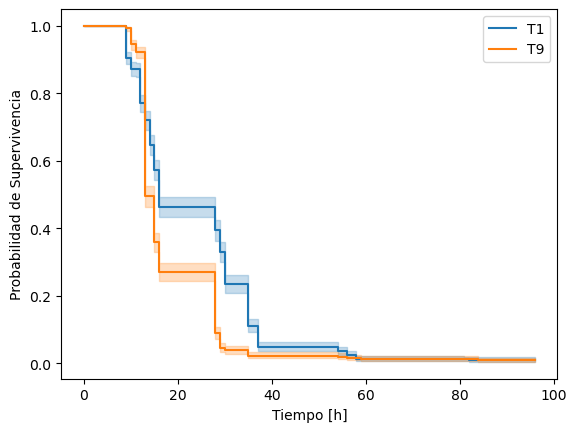

In [36]:
# Data for different measurements
mat = ['T1','T9']

# Create a subplot
fig, ax = plt.subplots()



for ma in mat:
    time_data = melted_df[melted_df['Material'] == ma]['Time']
    observed_data = melted_df[melted_df['Material'] == ma]['observed']
    plot_survival(ax, ma, time_data, observed_data)
    
    
# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
#ax.set_title('Material T1')
ax.legend()

# Show the plot
plt.show()    

Antes de intentar interpretar estas diferentes curvas, es importante que evalúemos si son estadísticamente diferentes entre sí. Comparando cada curva con las demás, podemos calcular la probabilidad de que estas curvas no difieran entre sí utilizando el **log-rank test**.

- NOTA: Al agregar un argumento para $t_0$ a la siguiente llamada, puede calcular las mismas métricas para cada curva en un momento específico, en lugar de hacerlo en todos los momentos, como se muestra aquí

In [37]:
from lifelines.statistics import logrank_test
#results = logrank_test(durations_A=melted_df[melted_df['Material'] == 'T1']['Time'],durations_B=melted_df[melted_df['Material'] == 'T9']['Time'], event_observed_A=melted_df[melted_df['Material'] == 'T1']['observed'], event_observed_B=melted_df[melted_df['Material'] == 'T9']['observed'])
log_ = pairwise_logrank_test(melted_df['Time'], melted_df['Material'], melted_df['observed'])#, t_0=13)
log_.summary

#results.p_value

,,test_statistic,p,-log2(p)
T1,T9,123.36587,1.159665e-28,92.800278


* Un p-value grande indica evidencia débil contra la hipótesis nula. (No se puede rechazar la hipótesis nula a un nivel de significancia de 0.05)

* Un p-value pequeño indica evidencia fuerte contra la hipótesis nula. (Rechazas la hipótesis nula a un nivel de significancia de 0.05.)

La hipótesis nula es que las semillas T1 y T9 tienen las mismas curvas de supervivencia. Dada esta hipótesis nula y el valor p que acabas de calcular, ¿qué puedes concluir?
**Rechazas la hipótesis nula a un nivel de significancia de 0.05** 

En general y específicamente en la hora 15, el tiempo medio de supervivencia identificado anteriormente, la mayoría de estas curvas son significativamente diferentes entre sí (como lo indica que casi todos los valores de p son <0,05).

In [38]:
for ma in mat:
    time_data = melted_df[melted_df['Material'] == ma]['Time']
    observed_data = melted_df[melted_df['Material'] == ma]['observed']
    median_survival(ma, time_data, observed_data)

T1 16.0
T9 13.0


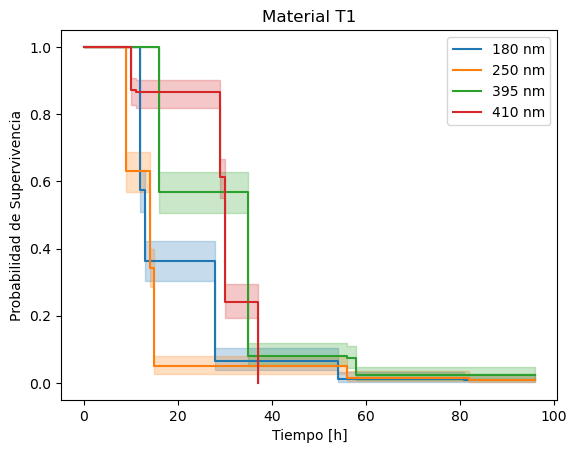

In [39]:
# Data for different measurements
measurements = ['T1_180','T1_250', 'T1_395', 'T1_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()



for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_survival(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T1')
ax.legend()

# Show the plot
plt.show()



In [40]:
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    median_survival(color, time_data, observed_data)

180 nm 13.0
250 nm 14.0
395 nm 35.0
410 nm 30.0


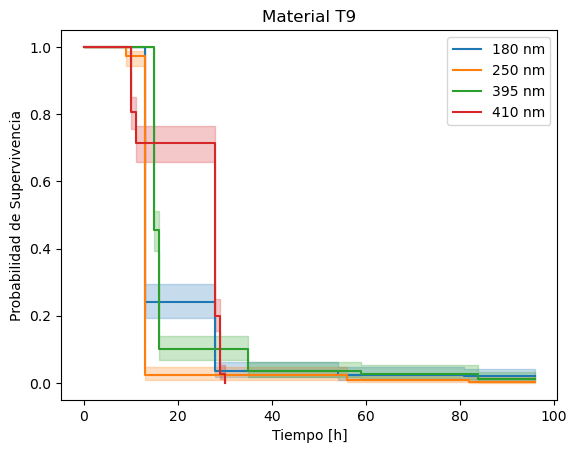

In [41]:
# Data for different measurements
measurements = ['T9_180','T9_250', 'T9_395', 'T9_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_survival(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T9')
ax.legend()

# Show the plot
plt.show()

In [42]:
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    median_survival(color, time_data, observed_data)

180 nm 13.0
250 nm 13.0
395 nm 15.0
410 nm 28.0


- Use the **log-rank test** to determine if survival curves are statistically equivalent
- The log-rank test is a chi-square test that is used to test the **null hypothesis** that two or more survival curves are statistically equivalent

In [43]:
# Run log-rank test to compare seeds with different treatments
log_rank = pairwise_logrank_test(melted_df['Time'], melted_df['Measurement'], melted_df['observed'])#, t_0=184)
log_rank.summary

test_statistic             p    -log2(p)
T1_180 T1_250        9.703162  1.839512e-03    9.086461
       T1_395      150.462909  1.373346e-34  112.487860
       T1_410      137.157343  1.113990e-31  102.824035
       T9_180        7.970547  4.754457e-03    7.716504
       T9_250        0.054454  8.154868e-01    0.294266
       T9_395        9.566677  1.981411e-03    8.979256
       T9_410       12.037968  5.212776e-04   10.905660
T1_250 T1_395      358.483359  6.023238e-80  263.163708
       T1_410      200.959817  1.289379e-45  149.120087
       T9_180        4.038386  4.447633e-02    4.490818
       T9_250       41.957216  9.329249e-11   33.319448
       T9_395      185.934596  2.453411e-42  138.226191
       T9_410      110.796263  6.557521e-26   83.656980
T1_395 T1_410        3.471292  6.244252e-02    4.001328
       T9_180      208.035566  3.685182e-47  154.248885
       T9_250      405.434042  3.614363e-90  297.119787
       T9_395      163.823966  1.652789e-37  122.186437
       T9_410      128.603285  8.282317e-30   96.607808
T1_410 T9_180      203.258460  4.062477e-46  150.786333
       T9_250      196.622993  1.139728e-44  145.976147
       T9_395      137.093983  1.150108e-31  102.778001
       T9_410      249.948540  2.664762e-56  184.613967
T9_180 T9_250       40.763253  1.718341e-10   32.438265
       T9_395       40.107151  2.404074e-10   31.953800
       T9_410       28.687705  8.504194e-08   23.487250
T9_250 T9_395      369.535961  2.361729e-82  271.158260
       T9_410       70.564286  4.455097e-17   54.317321
T9_395 T9_410       24.439667  7.667362e-07   20.314766

Esto nos dice que las diferentes representaciones en el cuadro anterior son significativas. Es muy interesante que algunos tratamientos en la semillas tienen tasas de germinación muy diferentes. 

Aquí está la comparación pairwise, limitada a aquellas **curvas que no difieren lo suficiente entre sí** como para ser consideradas estadísticamente diferentes.

In [44]:
# Probability Curves are the same 
summary = log_rank.summary
summary[summary['p']>=0.05]

,,test_statistic,p,-log2(p)
T1_180,T9_250,0.054454,0.815487,0.294266
T1_395,T1_410,3.471292,0.062443,4.001328


A partir de los resultados del Log Rank test, parecería que las semillas con estos tratamientos T1_180 y T9_250, T1_250 y T9_180 no están diferenciados estadísticamente (al igual que T1_395 y T1_410)

# Parametric

Model time-to-event data with parametric models. Select the best survival model for your data. 

### The Weibull distribution
A continuous probability distribution that models time-to-event data very well ( but originally applied to model particle size distribution)

$$f(x;\lambda, k)=\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}$$

$$x>=0, k>0, \lambda>0$$

* k (or $$\rho$$): Determines the shape
* $$\lambda$$ : Determines the scale (indicates when 63.2% of the population has experienced the event)


###### Survival function
$$S(t)=e^{-(t/\lambda)^{\rho}}$$

- When $$k<1$$, germinación/event rate decreases over time
- When $$k=1$$, germinación/event rate is constant over time
- When $$k>1$$, germinación/event rate increases over time

In [45]:
# Histograma de germinación de semillas

melted_df.head()

,Measurement,Time,Material,UV,observed
0,T1_180,12.0,T1,180,1
1,T1_180,28.0,T1,180,1
2,T1_180,12.0,T1,180,1
3,T1_180,12.0,T1,180,1
4,T1_180,28.0,T1,180,1


Text(0.5, 1.0, 'Semillas Quinoa')

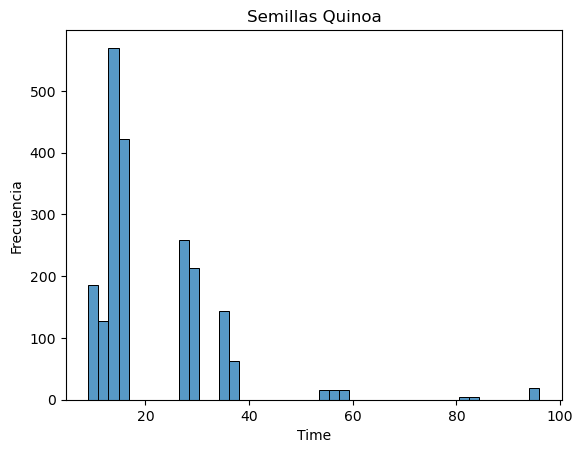

In [46]:
sns.histplot(data= melted_df, x='Time', bins=int(np.sqrt(len(melted_df)))) #binwidth=1)
plt.xlabel('Time')
plt.ylabel('Frecuencia')
plt.title('Semillas Quinoa')

In [47]:
from lifelines import WeibullFitter

In [48]:
wb = WeibullFitter()
wb.fit(melted_df['Time'], melted_df['observed'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 2060 total observations, 19 right-censored observations>

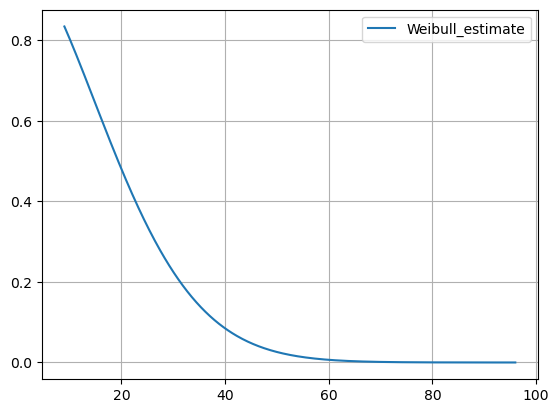

In [49]:
# Access .survival_function_, .lambda_, .rho_, .summary, .predict()
wb.survival_function_.plot()
plt.grid()

In [50]:
# Event increases as time goes on
print(wb.lambda_, wb.rho_)

23.88689111462736 1.7517294507735066


In [51]:
print(wb.predict(15))

0.642351352451179


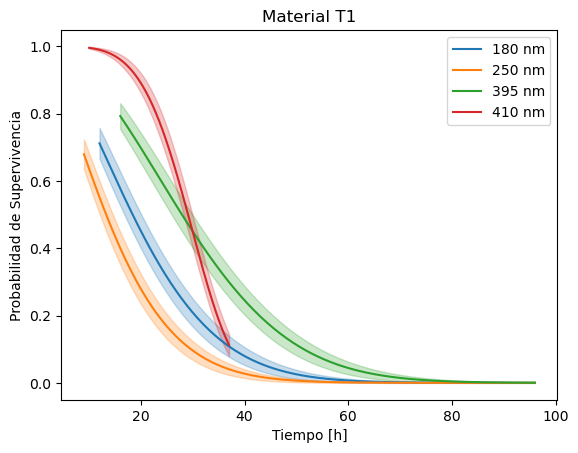

In [53]:
def plot_weibull(ax, label, time, observed):
    wb = WeibullFitter()
    wb.fit(time, observed, label=label)
    wb.plot_survival_function(ax=ax, label=label)

# Data for different measurements
measurements = ['T1_180','T1_250', 'T1_395', 'T1_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_weibull(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T1')
ax.legend()

# Show the plot
plt.show()

In [54]:
def weibull_lr(label, time, observed):
    wb = WeibullFitter()
    wb.fit(time, observed, label=label)
    print(label,wb.lambda_, wb.rho_)

In [55]:
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    weibull_lr(color, time_data, observed_data)

180 nm 22.916620770454397 1.6681841255570593
250 nm 16.9793341437924 1.4967863751857562
395 nm 33.628373570595 1.9663027181096342
410 nm 31.41080860885849 4.773741410656731


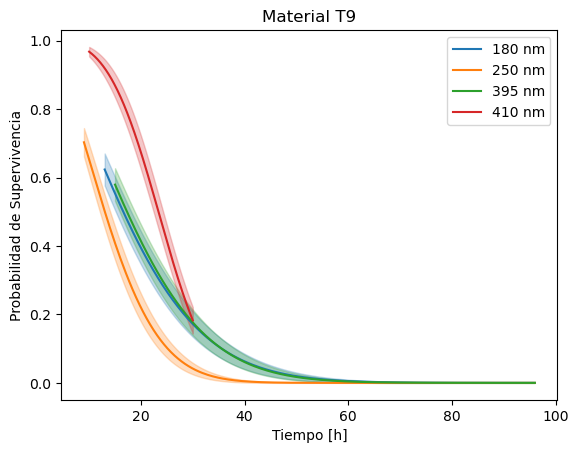

In [56]:
# Data for different measurements
measurements = ['T9_180','T9_250', 'T9_395', 'T9_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']


# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_weibull(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T9')
ax.legend()

# Show the plot
plt.show()

In [57]:
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    weibull_lr(color, time_data, observed_data)

180 nm 20.938228413468643 1.5735776373148826
250 nm 15.934397693341255 1.8263470643805169
395 nm 21.56661218355623 1.6669923302399037
410 nm 25.886891873123965 3.5951479122346903


# The Accelerated Failure Time (AFT) model

Population A: $$S_A(t)$$
Population B: $$S_B(t)$$

$$S_A(t)=S_B(t*\lambda)$$

* $$S_B(t)$$ is speeding up (accelerating) or slowing down (decelerating) along $$S_A(t)$$ by a factor of $$\lambda$$

In [58]:
from lifelines import WeibullAFTFitter

In [59]:
melted_df[['Measurement','Material']]=melted_df[['Measurement','Material']].astype('category')

In [60]:
melted_df['Mat_dummy'] = melted_df.Material.cat.codes
melted_df['Measu_dummy'] = melted_df.Measurement.cat.codes
melted_df['UV_dummy'] = melted_df.UV.cat.codes
#.dtypes#

In [61]:
#melted_aft=melted_df[['Time', 'observed', 'Mat_dummy','Measu_dummy', 'UV_dummy']].copy()

melted_aft=melted_df[['Time', 'observed', 'Measu_dummy']].copy()

In [62]:
aft = WeibullAFTFitter()

In [63]:
aft.fit(df=melted_aft, duration_col='Time', event_col='observed')

<lifelines.WeibullAFTFitter: fitted with 2060 total observations, 19 right-censored observations>

In [64]:
print(aft.summary)

                         coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                    
lambda_ Measu_dummy -0.019882   0.980315  0.005685       -0.031025   
        Intercept    3.243571  25.625069  0.024314        3.195916   
rho_    Intercept    0.565984   1.761180  0.015149        0.536293   

                     coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                               
lambda_ Measu_dummy       -0.008739             0.969452             0.991299   
        Intercept          3.291226            24.432546            26.875799   
rho_    Intercept          0.595675             1.709657             1.814255   

                     cmp to           z              p     -log2(p)  
param   covariate                                                    
lambda_ Measu_dummy     0.0   -3.497045   4.704420e-04    11.053696  
        Intercept       0.0  133.

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

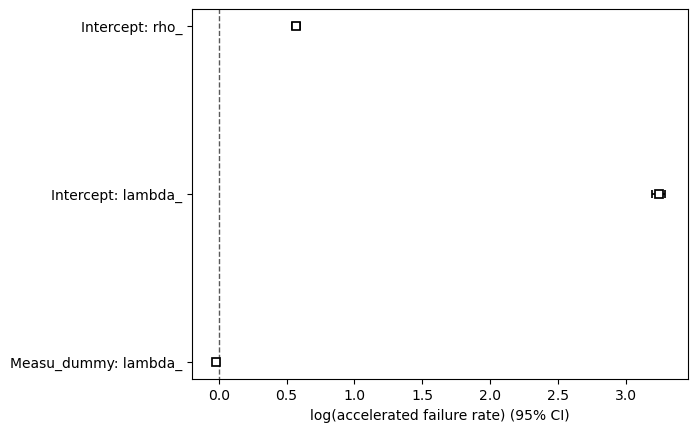

In [65]:
aft.plot()

<Axes: >

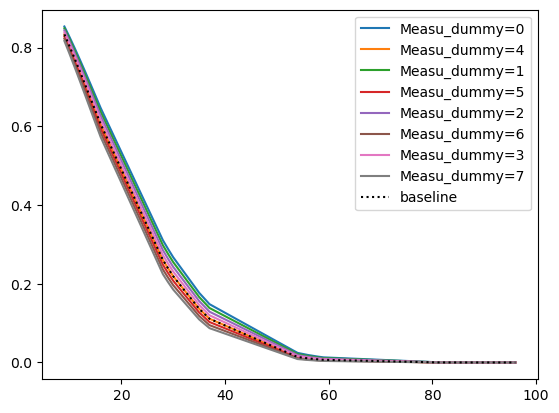

In [66]:
#aft.plot_partial_effects_on_outcome(covariates='Mat_dummy', values=[0, 1])
#aft.plot_partial_effects_on_outcome(covariates='UV_dummy', values=[0, 1, 2, 3])
aft.plot_partial_effects_on_outcome(covariates='Measu_dummy', values=[0, 4, 1, 5, 2, 6, 3, 7])

In [67]:
melted_aft.Measu_dummy.unique()

array([0, 4, 1, 5, 2, 6, 3, 7], dtype=int8)

## Other distributios and model selection

Many parametric models are commonly used for survival analysis, including the **Weibull model**, the **exponential model**, the **gamma model**, the **log normal model**, and the **log logistic model**. 

The **Akaike Information Criterion**, or **AIC metric**, is an estimator of prediction error and the quality of a model. It estimates the amount of information loss by any model and penalizes models with many parameters. Given a set of models, we could **compare their AIC values**. The model with the **lowest AIC value is the preferred model**.

In [68]:
from lifelines.utils import find_best_parametric_model


best_model, best_aic_=find_best_parametric_model(event_times=melted_df['Time'],
                                                 event_observed=melted_df['observed'],
                                                scoring_method="AIC")
print(best_model)

<lifelines.SplineFitter:"SplineFitter: 3 internal knot", fitted with 2060 total observations, 19 right-censored observations>


In [69]:
def bestmodel(label, time, observed):
    best_model, best_aic_=find_best_parametric_model(event_times=time,
                                                 event_observed=observed,
                                                scoring_method="AIC")
    print(label,best_model)
    
    
for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    bestmodel(color, time_data, observed_data)

180 nm <lifelines.PiecewiseExponentialFitter:"PiecewiseExponentialFitter: 1 breakpoint", fitted with 260 total observations, 5 right-censored observations>
250 nm <lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 260 total observations, 1 right-censored observations>
395 nm <lifelines.PiecewiseExponentialFitter:"PiecewiseExponentialFitter: 2 breakpoint", fitted with 260 total observations, 3 right-censored observations>
410 nm <lifelines.SplineFitter:"SplineFitter: 3 internal knot", fitted with 260 total observations, 0 right-censored observations>


In [70]:
measurements

['T9_180', 'T9_250', 'T9_395', 'T9_410']

In [71]:
colors

['180 nm', '250 nm', '395 nm', '410 nm']

In [72]:
def plot_Piece(ax, label, time, observed):
    pw = PiecewiseExponentialFitter()
    pw.fit(time, observed, label=label)
    pw.plot_survival_function(ax=ax, label=label)

In [74]:
from lifelines import PiecewiseExponentialFitter

TypeError: PiecewiseExponentialFitter.__init__() missing 1 required positional argument: 'breakpoints'

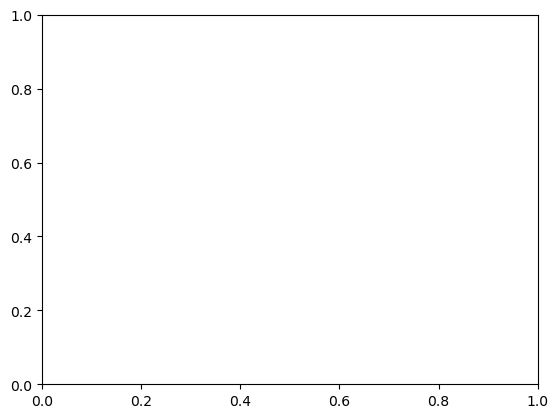

In [75]:
# Data for different measurements
measurements = ['T1_180','T1_250', 'T1_395', 'T1_410']
colors = ['180 nm','250 nm', '395 nm', '410 nm']

# Create a subplot
fig, ax = plt.subplots()

for measurement, color in zip(measurements, colors):
    time_data = melted_df[melted_df['Measurement'] == measurement]['Time']
    observed_data = melted_df[melted_df['Measurement'] == measurement]['observed']
    plot_Piece(ax, color, time_data, observed_data)

# Customize the plot
ax.set_xlabel('Tiempo [h]')
ax.set_ylabel('Probabilidad de Supervivencia')
ax.set_title('Material T1')
ax.legend()

# Show the plot
plt.show()